# Quantum Galton Board Experiments - Modified Distributions

This notebook explores alternative disributions yielded by the quantum board - we modify the control qubit to carry out a Y-rotation to implement bias in the board. We also optimise the bias angle of rotation using a function to minimise the least square regression loss function. We show: 

- The centrally biased exponential decay of the Laplace distribution.
- The exponential distribution
- (Previous notebook) Quantum Hadamard Walk
- Fast and full quantum circuit variants

Our goal is to investigate the emergence of different probability distributions and their quantum approximations. We show results from quantum circuits against Laplace and Exponential distributions.

You may need run estimation routines more than once (initial parameter guesses are randomised).

In [8]:
import os
os.chdir("..")
print(os.getcwd())

c:\Users\hayde\Desktop\Womanium 2025


In [9]:
from src.exponential_box import *
from utils.plot_utils import *
from utils.distance_metrics_utils import *

## Step 1: Approximating the Laplace Distribution Using our Biased Quantum Galton Board

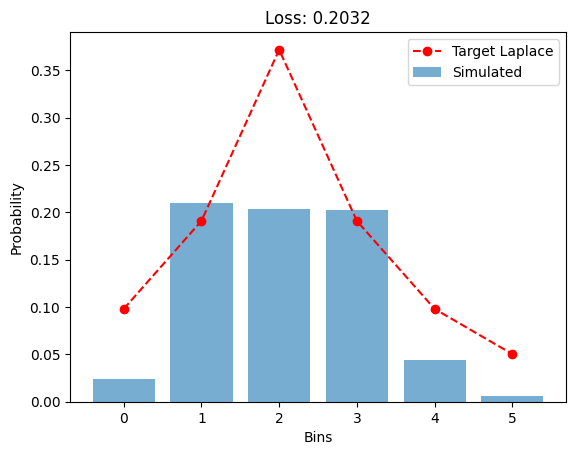

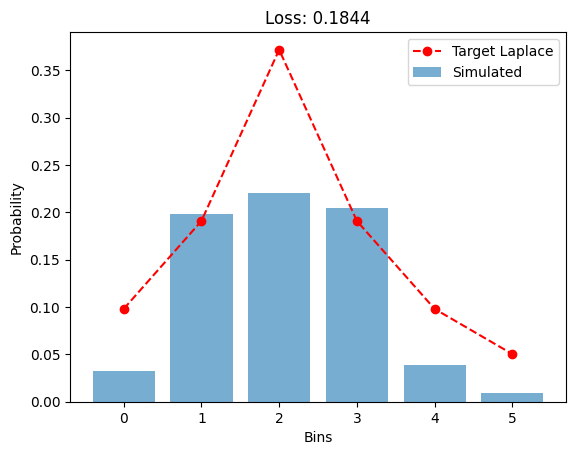

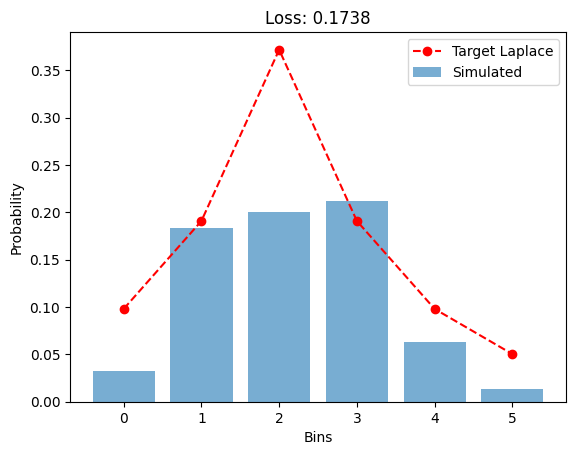

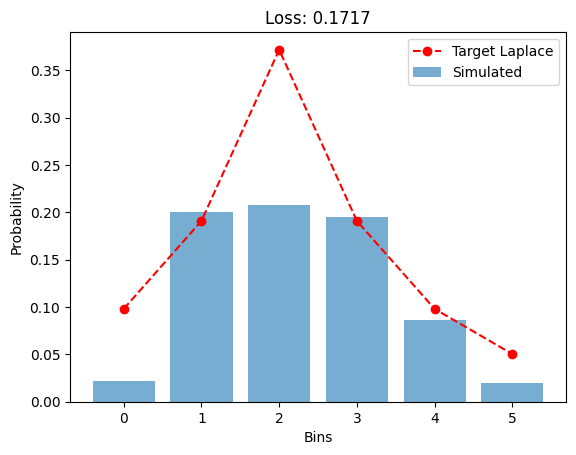

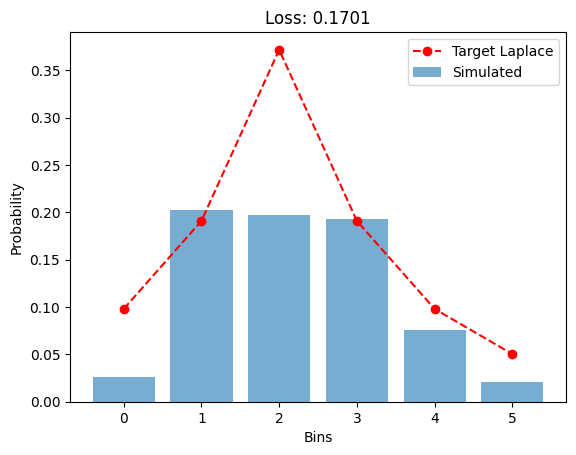

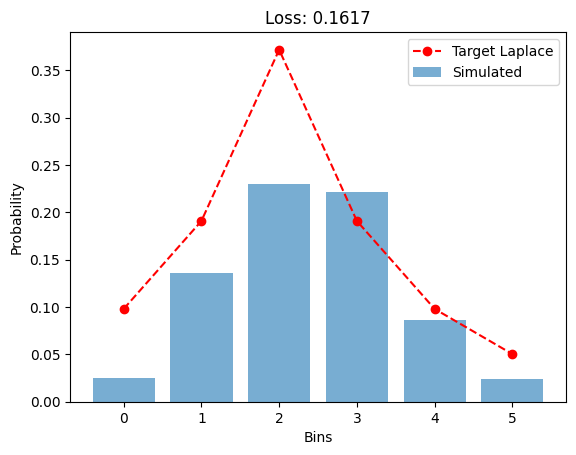

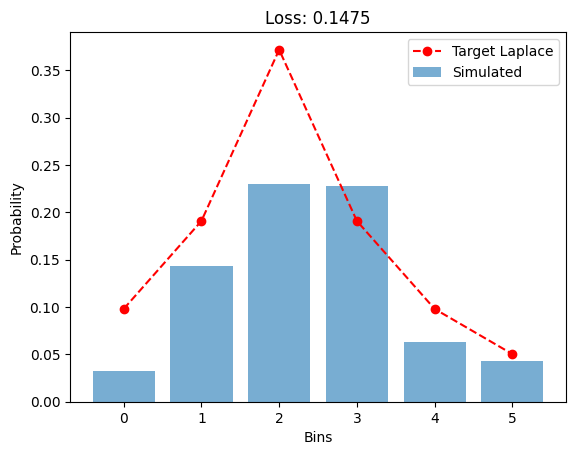

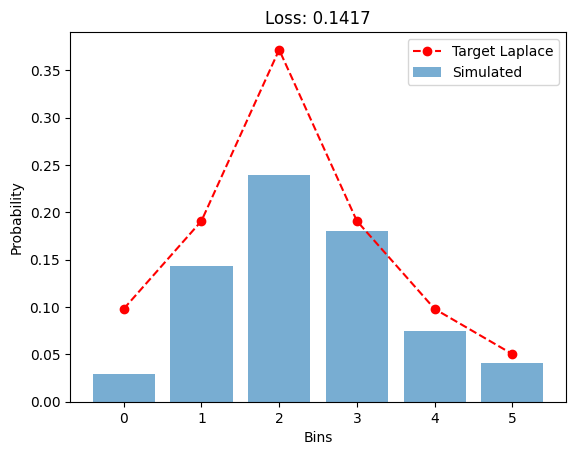

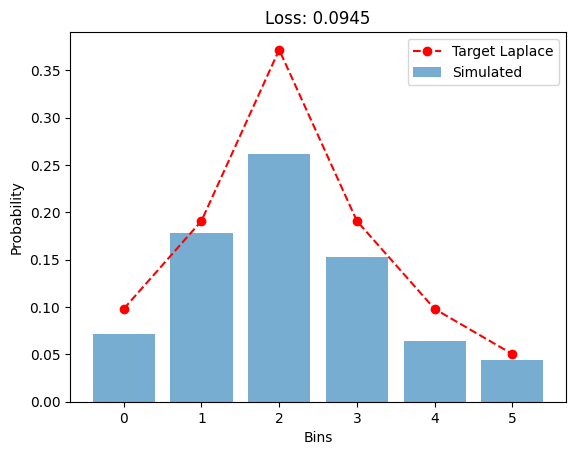

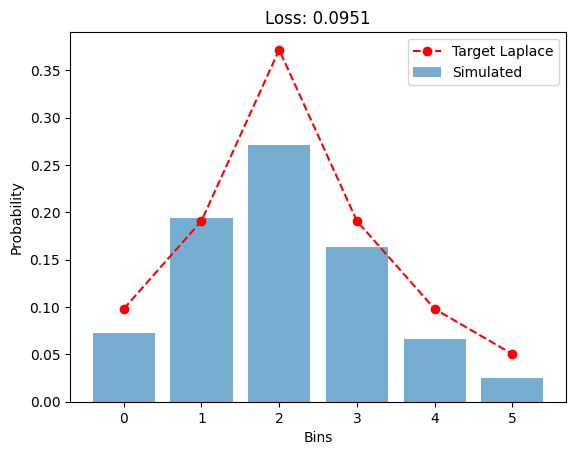

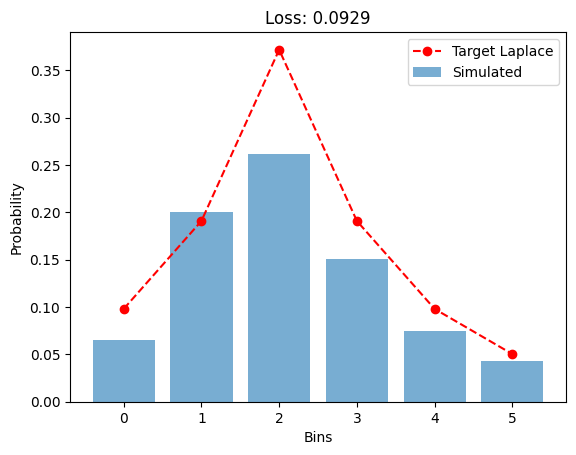

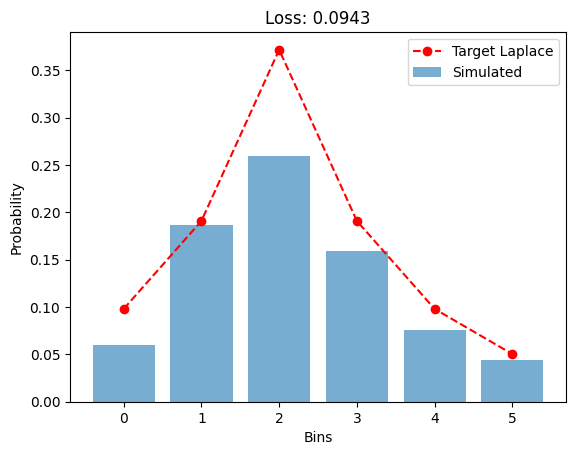

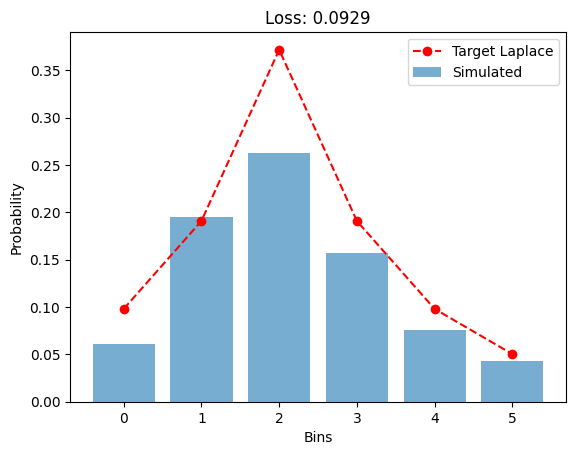

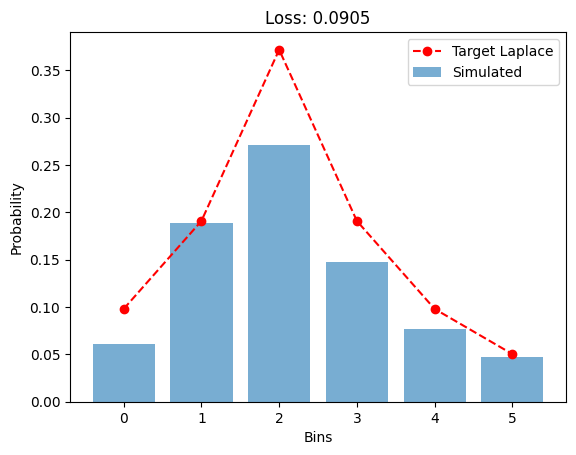

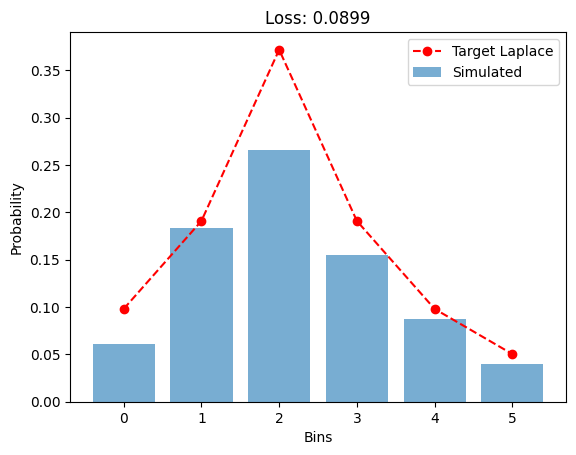

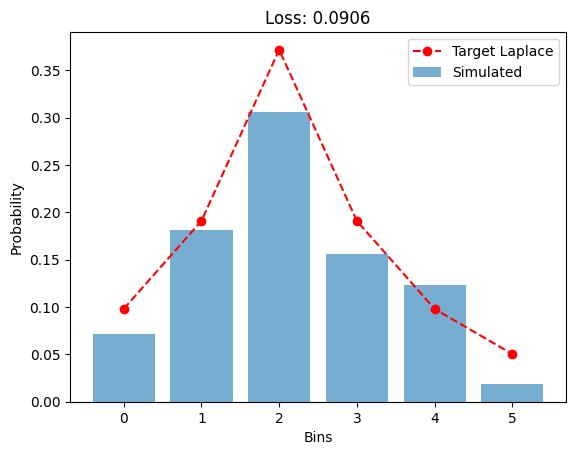

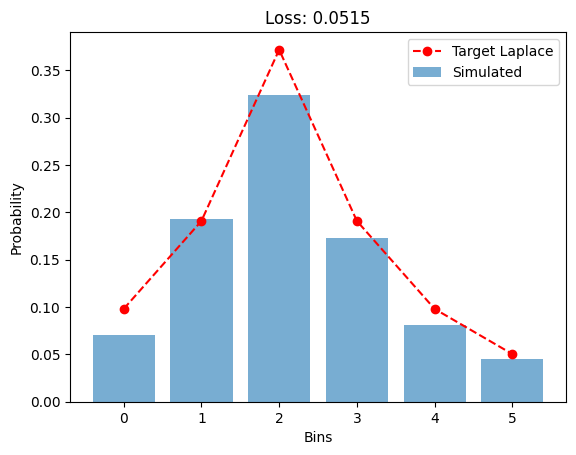

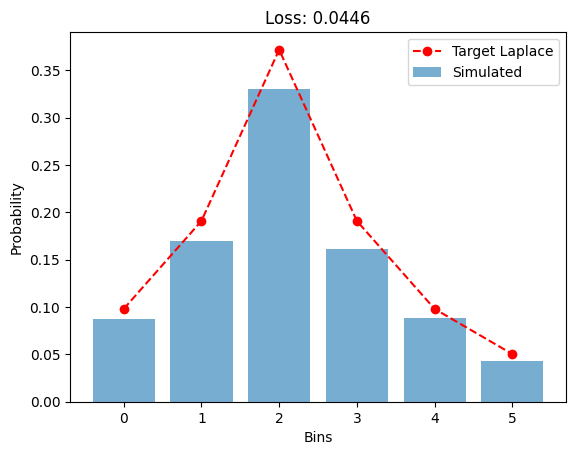

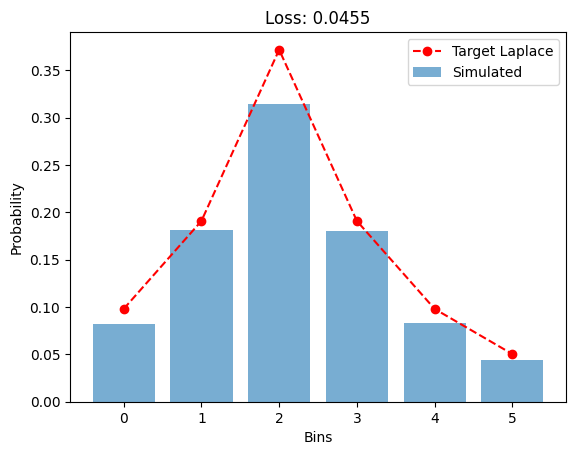

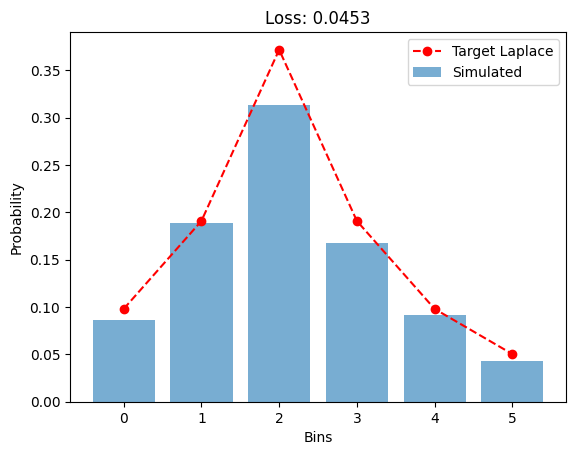

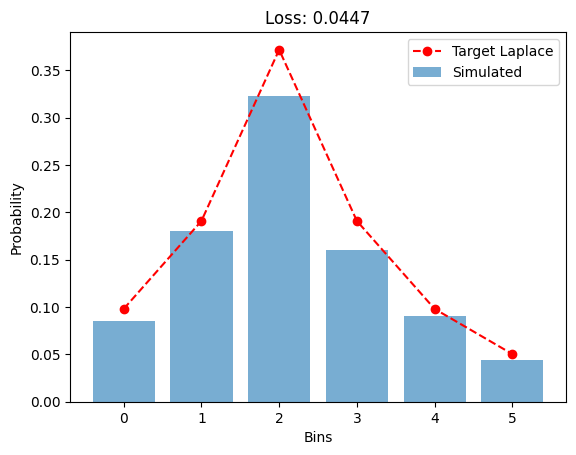

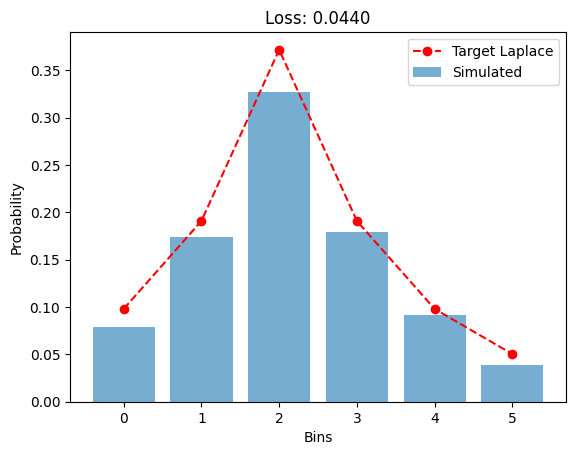

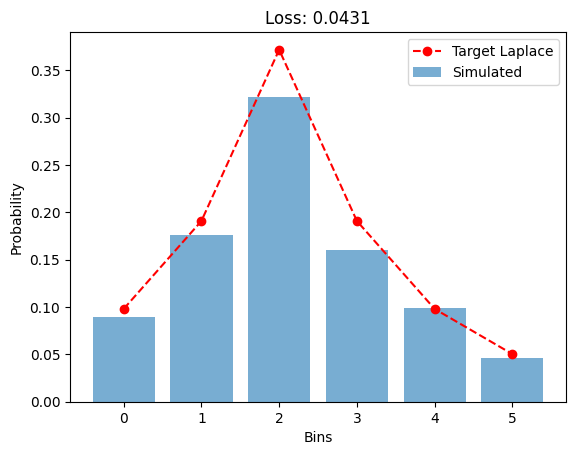

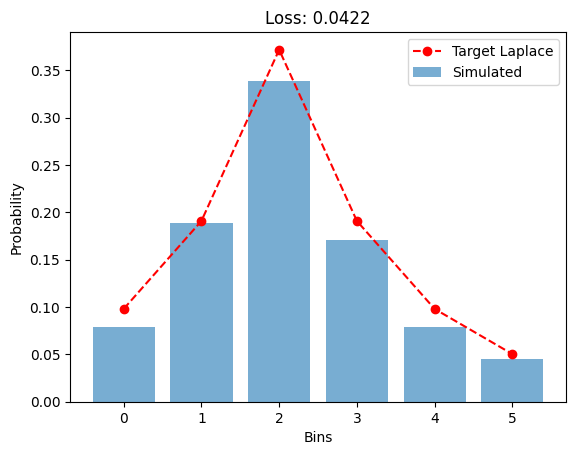

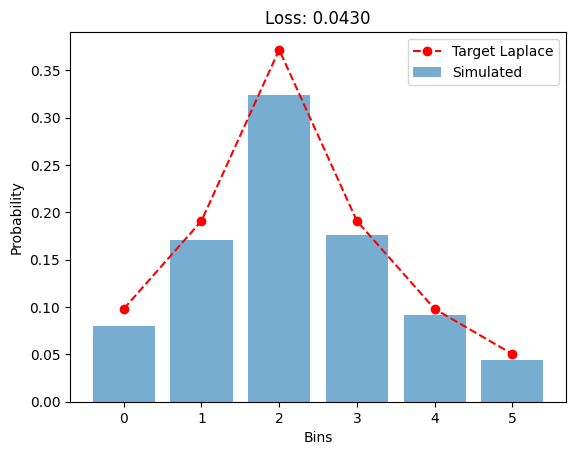

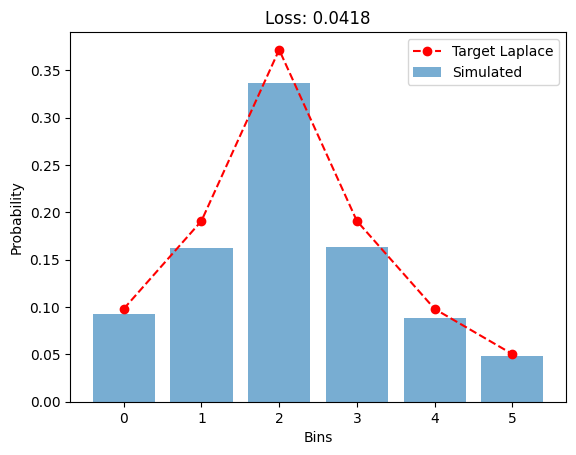

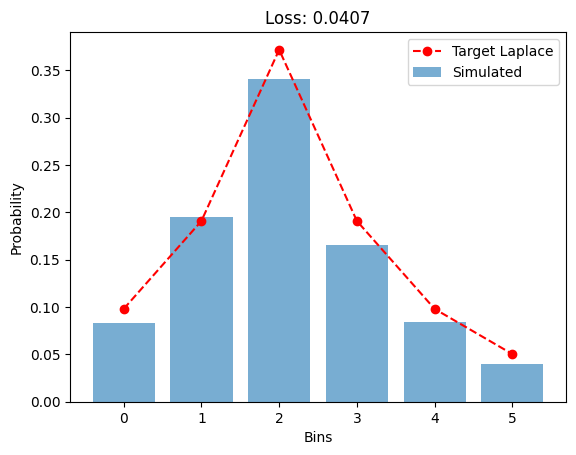

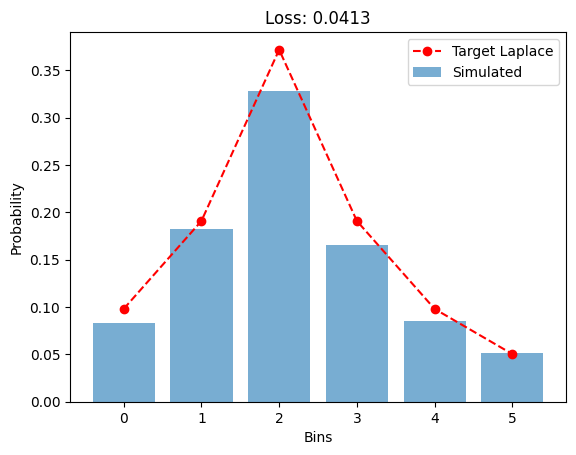


Time limit reached. Forcing optimization to stop.

Optimization stopped due to time limit.

Optimizer exit (best loss): 0.04729204797689354
Best Optimized thetas: [0.82235148 2.16041819 1.91346661 1.56707232 2.14532822 1.61051274
 2.33623815 1.45672717 1.29726189 1.1383562  2.43984415 1.37580072
 0.76049009 0.60725534 0.71076452]
Best Loss: 0.040710165774659274


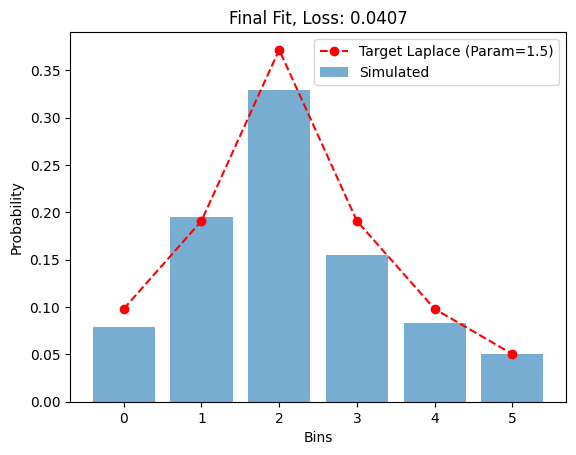

In [10]:
res = optimise_layerwise(n=5, target="laplace", decay=1.5, shots=2000, max_time=360) # note the loss function uses the Hellinger Distance

## Step 2: See Laplace Results and Calculate Distance Metric

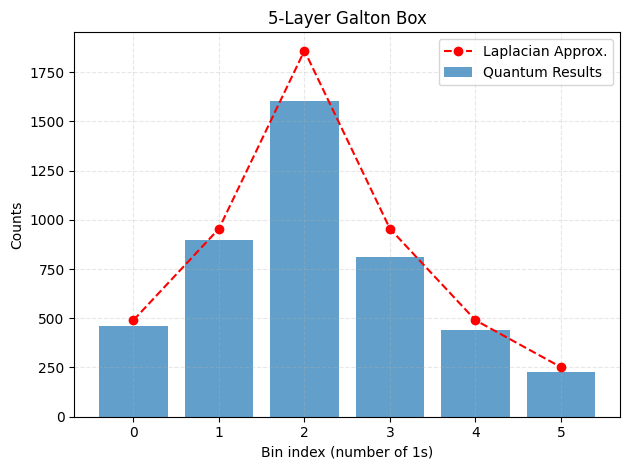

0.0192927896054765
0.03325200175360209
0.014796699478016226
0.014797099799056013


In [14]:
bin_counts = biased_galton_n_layer(n=5, shots=5000, thetas=res[0])
plot_bins(bin_counts, n=5, shots=5000, overlay="laplace", scale=1.5)
print(distribution_distance(bin_counts, target_distribution="laplace", b=1.5, mu=2, metric="tvd")) # TVD
print(distribution_distance(bin_counts, target_distribution="laplace", b=1.5, mu=2, metric="w1")) # 1D Wasserstein-1 Distance
print(distribution_distance(bin_counts, target_distribution="laplace", b=1.5, mu=2, metric="js")) # Jensen-Shannon Distance
print(distribution_distance(bin_counts, target_distribution="laplace", b=1.5, mu=2, metric="hel")) # Hellinger Distance

## Step 3: Try Laplace with Noise Model and Calculate New Distance Metric

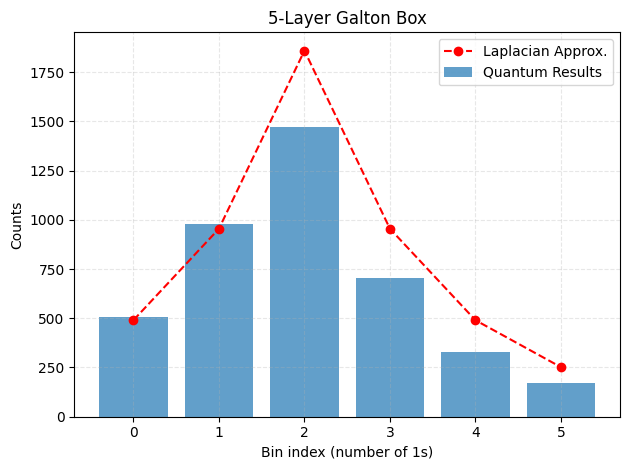

0.06784334883365772
0.17889213904800946
0.054477071779288525
0.05449969527830644


In [15]:
bin_counts = biased_galton_n_layer(n=5, shots=5000, thetas=res[0], noise=True)
plot_bins(bin_counts, n=5, shots=5000, overlay="laplace", scale=1.5)
print(distribution_distance(bin_counts, target_distribution="laplace", b=1.5, mu=2, metric="tvd")) # TVD
print(distribution_distance(bin_counts, target_distribution="laplace", b=1.5, mu=2, metric="w1")) # 1D Wasserstein-1 Distance
print(distribution_distance(bin_counts, target_distribution="laplace", b=1.5, mu=2, metric="js")) # Jensen-Shannon Distance
print(distribution_distance(bin_counts, target_distribution="laplace", b=1.5, mu=2, metric="hel")) # Hellinger Distance
# Note a clear increase in distance metrics when using noise model, as expected.

## Step 4: Average Over Multiple Runs and t-test to Account for Stochastic Uncertainty

In [ ]:
metrics = []
for i in range(50):
    bin_counts = biased_galton_n_layer(n=5, shots=1000, thetas=res[0], noise=True)
    metric = distribution_distance(bin_counts, target_distribution="laplace", b=1.5, mu=2)
    metrics.append(metric)
print(significance_test(metrics, test_type='t', significance_level=0.05, threshold=0.1)) # acceptable error threshold of 0.1
# Note that for better approximations, we can increase optimisation max_time, increase n and shots...etc
# Based on the results, even under noise the Galton Board performs well.

Normality assumption is valid.
Mean Distance: 0.07846811580970009
Standard Deviation: 0.020633977504285684
Test Statistic: -7.3787718919060445
P-Value: 0.9999999991392134
Significance Level: 0.05
Given that the p-value is > the significance level, we accept the Null Hypothesis that the population mean of the distances calculated is within the acceptable threshold. Thus, we conclude that the distance between the observed and target distributions is not statistically significant at this significance level.


## Step 5: Exponential Distribution with Biased QGB

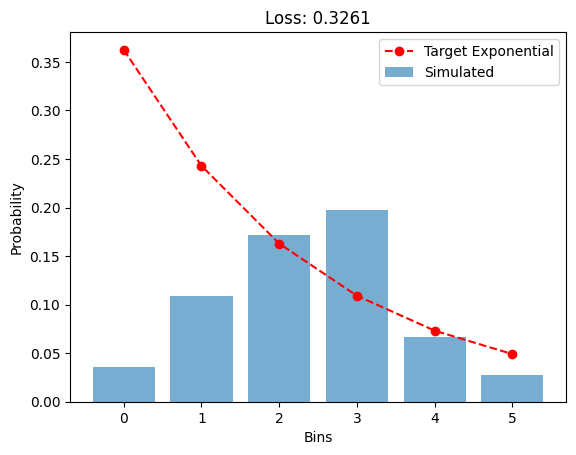

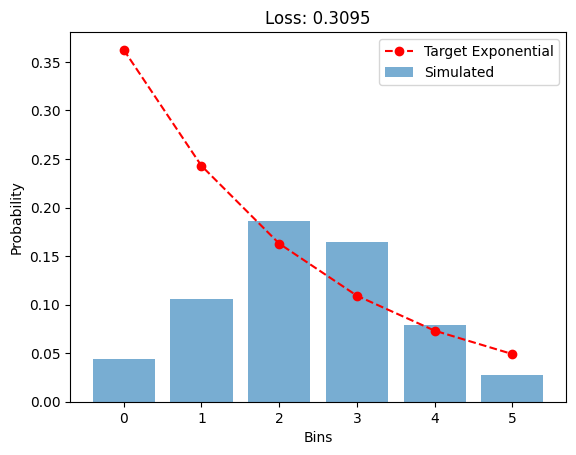

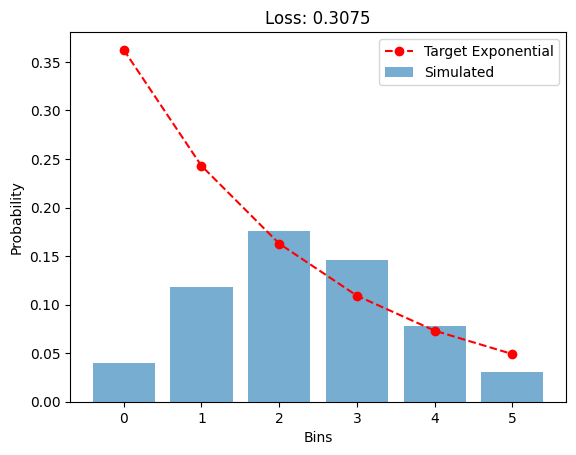

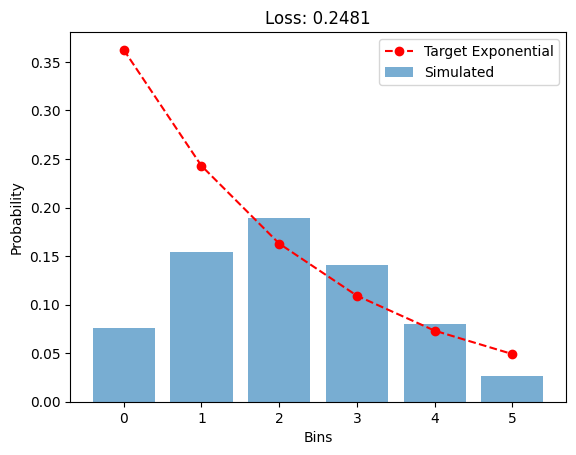

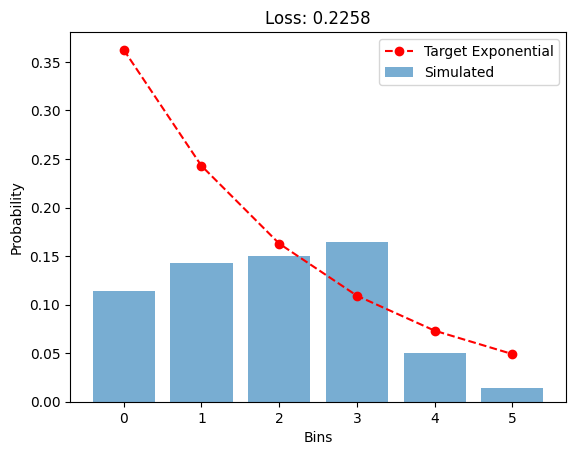

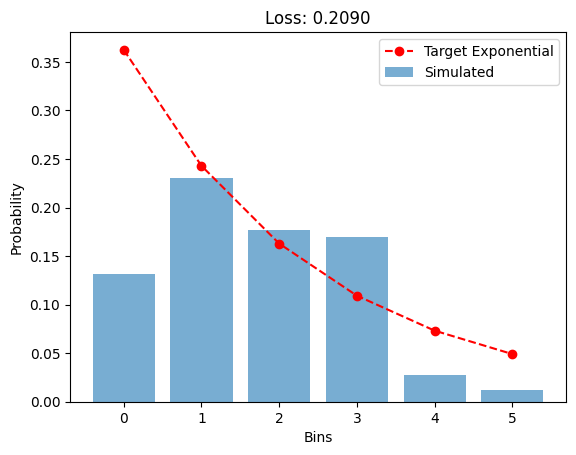

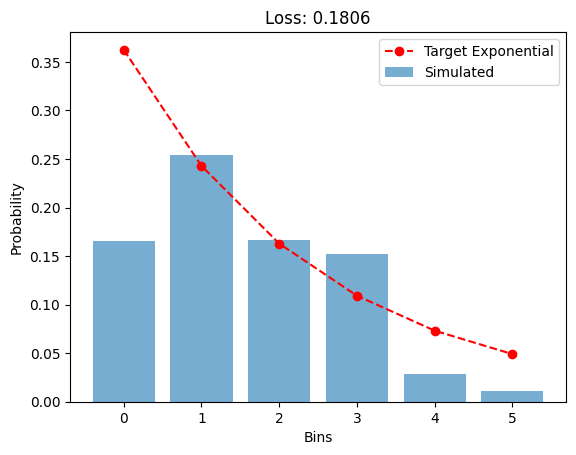

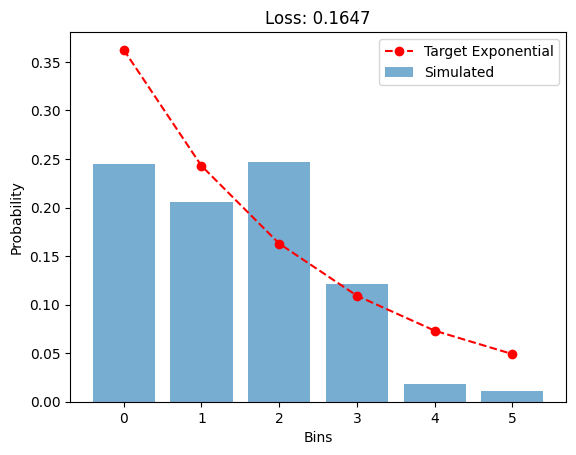

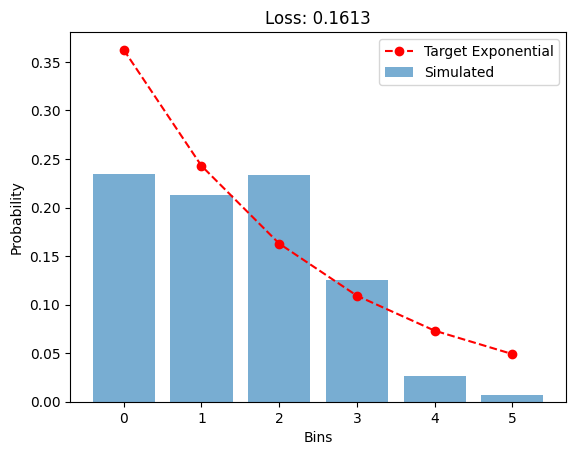

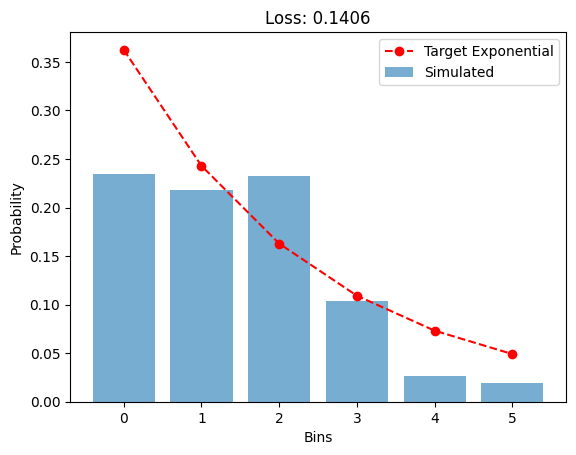

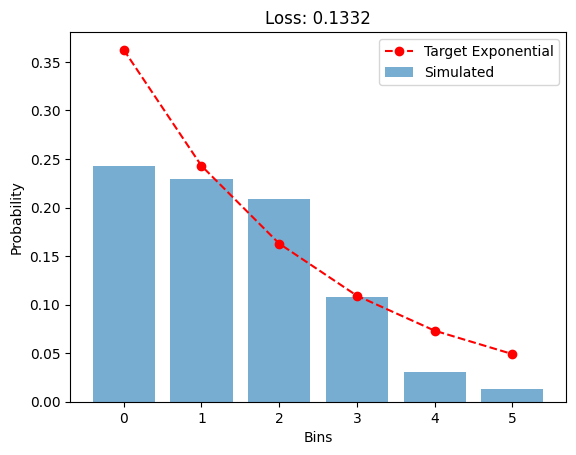

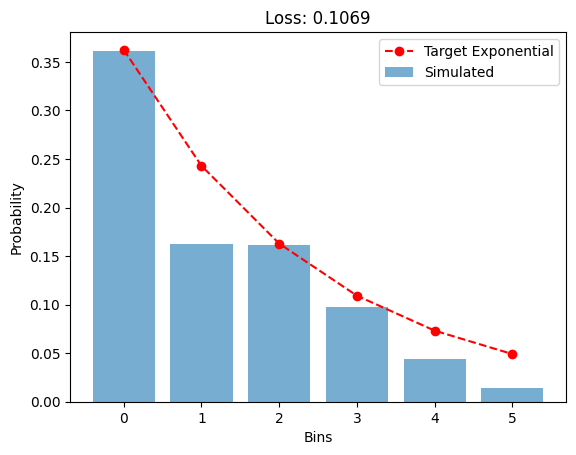

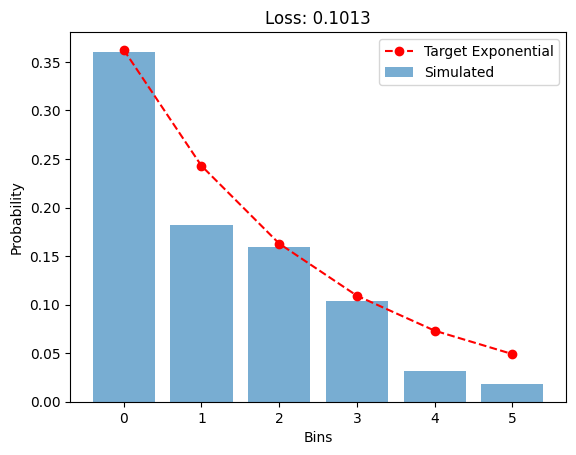

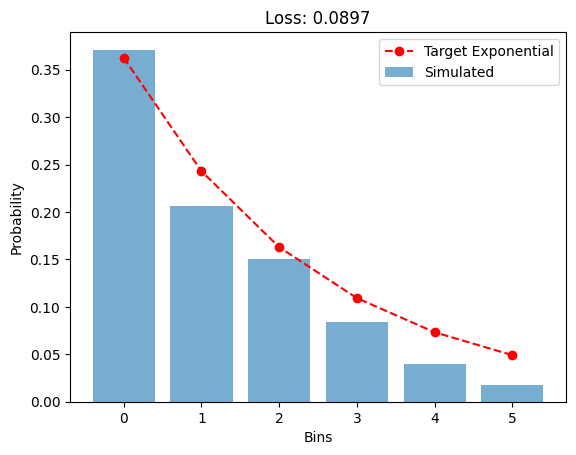

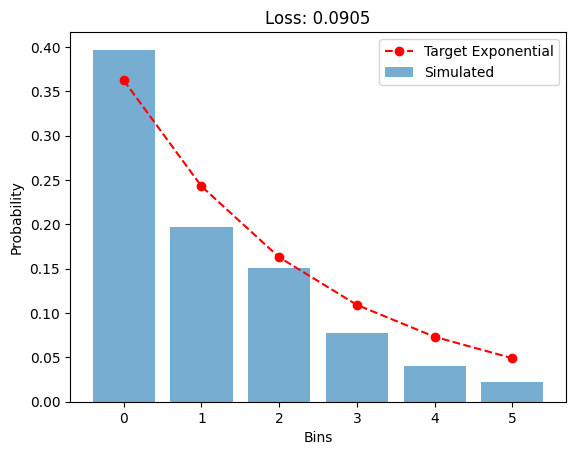

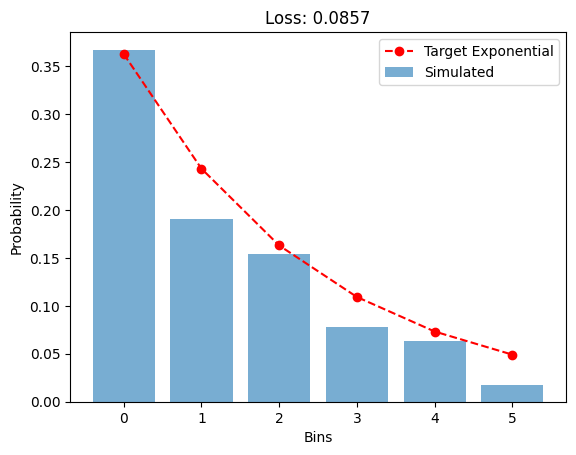

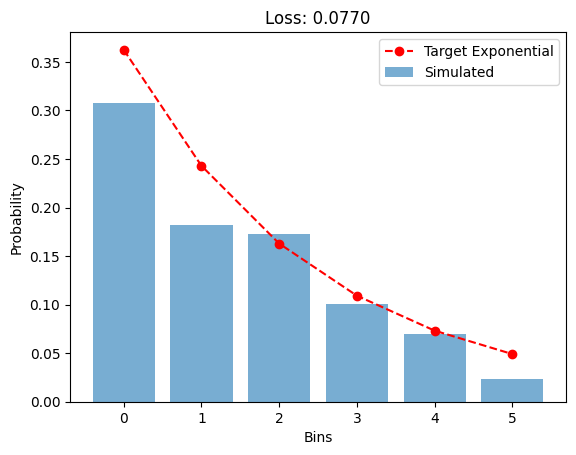

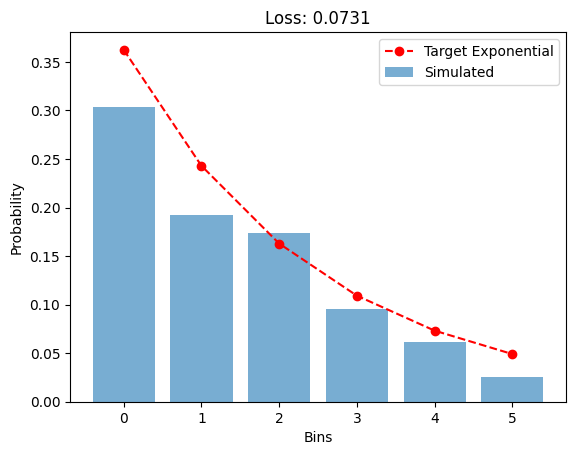

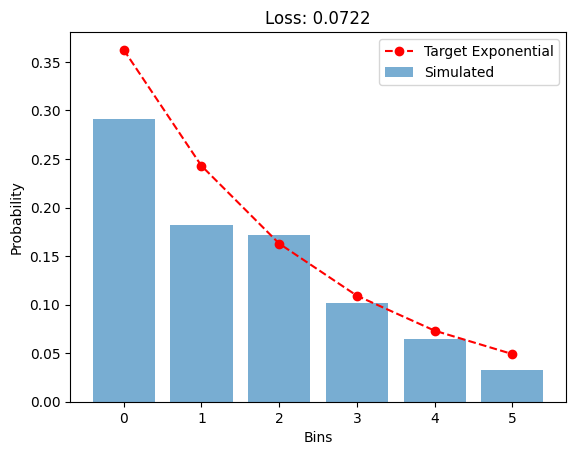

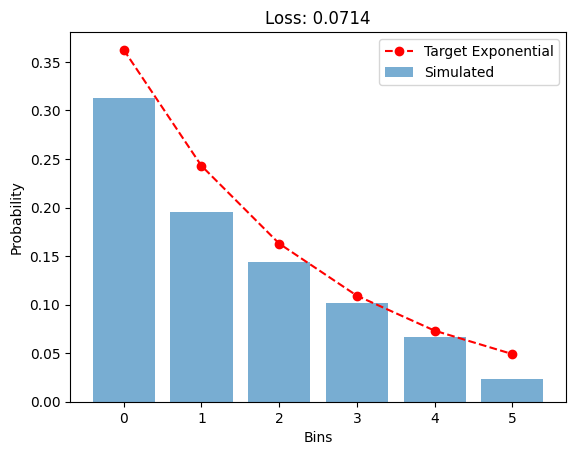

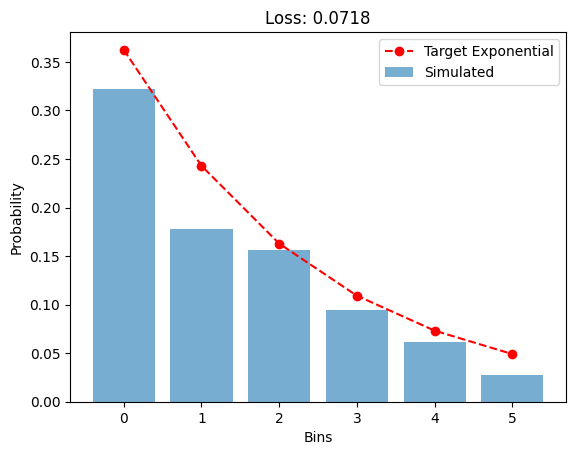

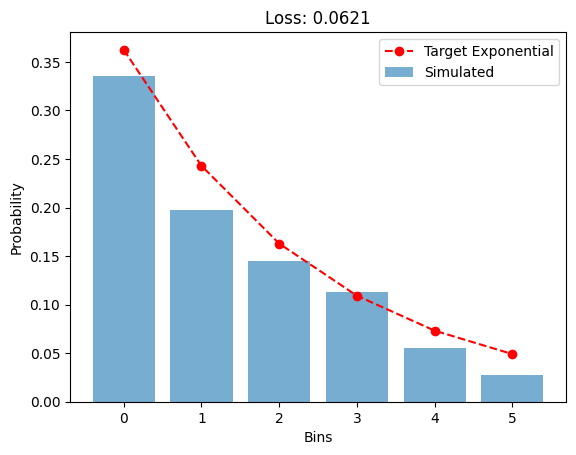

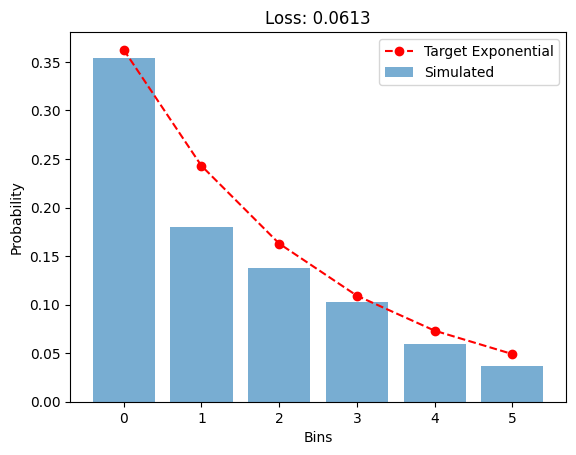

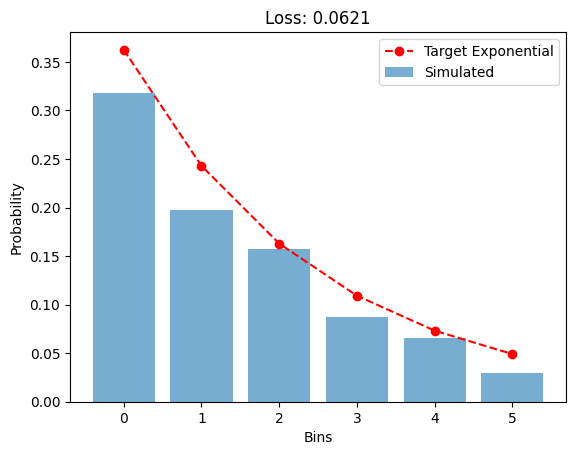

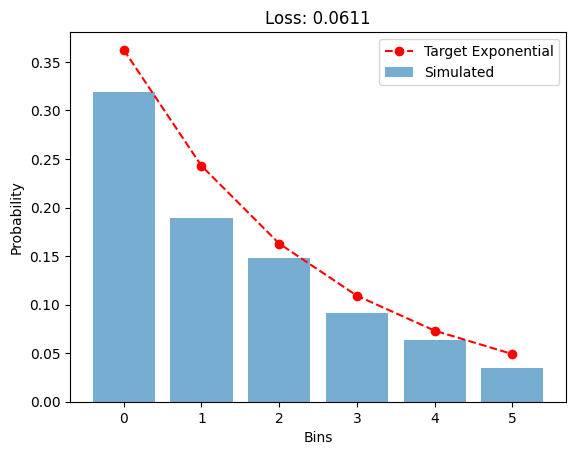


Time limit reached. Forcing optimization to stop.

Optimization stopped due to time limit.

Optimizer exit (best loss): 0.08988227148992094
Best Optimized thetas: [1.12506609 2.48852183 0.25445286 2.26604671 1.26655537 0.93419786
 1.43132423 1.60068799 1.2627878  1.3319604  1.06288022 0.17565752
 1.93185656 1.52341241 0.28304963]
Best Loss: 0.061109850774019626


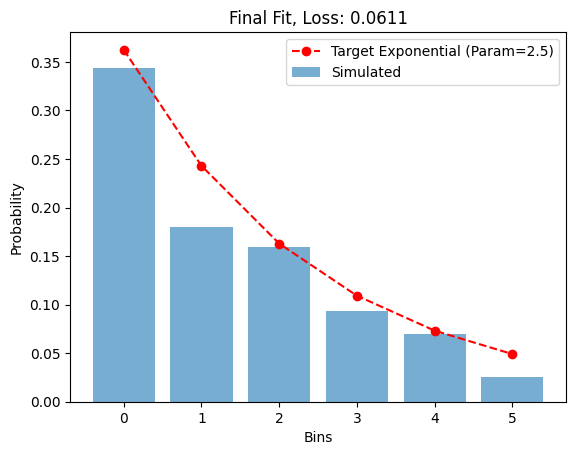

In [17]:
res = optimise_layerwise(n=5, shots=1000, target="exponential", scale=2.5, max_time=360) # Again using Hellinger Distance in loss function

## Step 6: View Results of Exponential Optimisation Routine

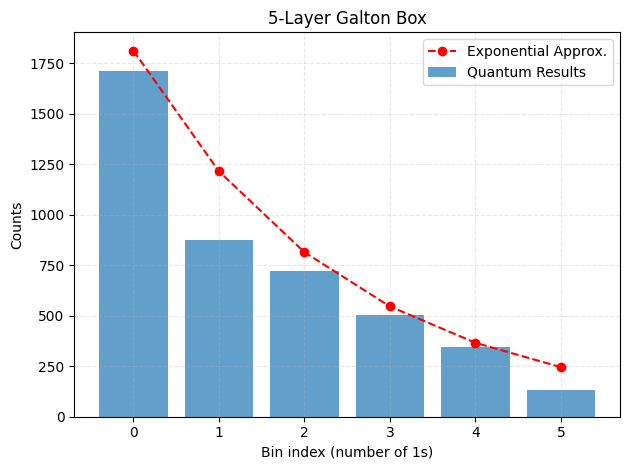

0.0572664190654181
0.07215973721540231
0.050473126879100334
0.05052939033308727


In [ ]:
bin_counts = biased_galton_n_layer(n=5, shots=5000, thetas=res[0], mode="full")
plot_bins(bin_counts, n=5, shots=5000, overlay="exponential", scale=2.5)
print(distribution_distance(bin_counts, target_distribution="exponential", lamda=2/5, metric="tvd")) # TVD
print(distribution_distance(bin_counts, target_distribution="exponential", lamda=2/5, metric="w1")) # 1D Wasserstein-1 Distance
print(distribution_distance(bin_counts, target_distribution="exponential", lamda=2/5, metric="js")) # Jensen-Shannon Distance
print(distribution_distance(bin_counts, target_distribution="exponential", lamda=2/5, metric="hel")) # Hellinger Distance
# Galton Board Appears to achieve low losses.

## Step 7: Try with Noise Model and Recompute Distance Metric

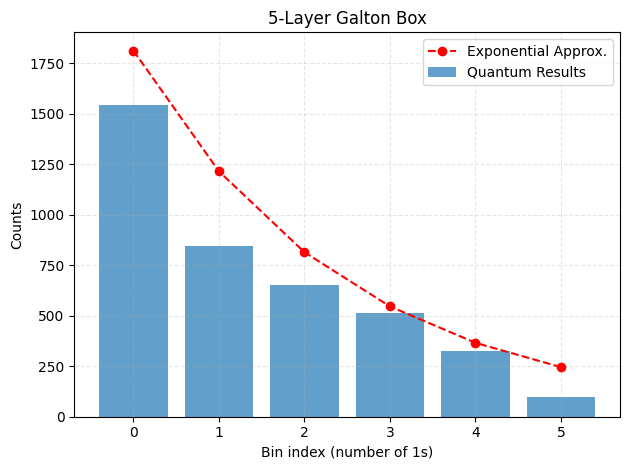

0.05441939476481057
0.07436062049634445
0.056744623723156806
0.05690798252868891


In [ ]:
bin_counts = biased_galton_n_layer(n=5, shots=5000, thetas=res[0], noise=True)
plot_bins(bin_counts, n=5, shots=5000, overlay="exponential", scale=2.5)
print(distribution_distance(bin_counts, target_distribution="exponential", lamda=2/5, metric="tvd")) # TVD
print(distribution_distance(bin_counts, target_distribution="exponential", lamda=2/5, metric="w1")) # 1D Wasserstein-1 Distance
print(distribution_distance(bin_counts, target_distribution="exponential", lamda=2/5, metric="js")) # Jensen-Shannon Distance
print(distribution_distance(bin_counts, target_distribution="exponential", lamda=2/5, metric="hel")) # Hellinger Distance
# Interestingly, noise does not appear to increase distances too much (a miniscule amount on some metrics). This is a good sign for the Galton Board model.

## Step 8: Average Over Multiple Runs and t-test to Account for Stochastic Uncertainty

In [23]:
metrics = []
for i in range(50):
    bin_counts = biased_galton_n_layer(n=5, shots=1000, thetas=res[0], noise=True)
    metric = distribution_distance(bin_counts, target_distribution="exponential", lamda=2/5)
    metrics.append(metric)
print(significance_test(metrics, test_type='t', significance_level=0.05, threshold=0.1)) # acceptable error threshold of 0.1
# after averaging, noise model appears to perform well.

Normality assumption is valid.
Mean Distance: 0.061614853967153216
Standard Deviation: 0.01346480692373613
Test Statistic: -20.15802915733943
P-Value: 1.0
Significance Level: 0.05
Given that the p-value is > the significance level, we accept the Null Hypothesis that the population mean of the distances calculated is within the acceptable threshold. Thus, we conclude that the distance between the observed and target distributions is not statistically significant at this significance level.
